### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None

plt.style.use('ggplot')
%matplotlib inline

### Bringing in dataset

In [2]:
modeling_crimes = pd.read_pickle('modeling_crimes.pkl')

In [3]:
modeling_crimes

,arrest,domestic,pct_sfh,pct_condo,pct_2_to_4_unit_building,pct_5_plus_unit_building,pct_business_share_sales,mobility_rate_pct,chronic_truancy_pct,prestigious_school,avg_grocery_store_sq_ft,pct_grocery_stores_over_10000_sq_ft,pct_high_risk_food_establishments,pct_failed_inspections,clinics_count,libraries_count,pharma_count,housing_market_health,aggravated_battery,assault,burglary,criminal_damage,criminal_trespass,deceptive_practice,domestic_battery,narcotics,other_offense,retail_theft,robbery,simple_battery,theft,weapons_violation,average_school_quality,highly_above_average_school_quality,low_avg_school_quality,slightly_above_average_school_quality
0,0,0,63.1,0.0,22.0,14.9,42.5,21.700,16.950,0.0,4733.333,0.0,63.2,42.1,0.0,0.0,1.0,0.665145,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,1,63.1,0.0,22.0,14.9,42.5,26.800,62.640,40.0,8933.667,66.7,81.6,22.4,0.0,0.0,2.0,0.665145,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,63.1,0.0,22.0,14.9,42.5,22.800,53.367,33.3,5333.667,33.3,72.4,17.2,1.0,0.0,1.0,0.665145,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,63.1,0.0,22.0,14.9,42.5,10.900,42.300,50.0,3000.000,0.0,80.0,60.0,1.0,1.0,0.0,0.665145,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,63.1,0.0,22.0,14.9,42.5,18.667,39.967,33.3,8000.000,50.0,71.4,42.9,0.0,1.0,0.0,0.665145,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258609,0,0,69.4,0.5,21.9,8.2,6.5,42.633,76.567,33.3,7250.500,50.0,50.0,11.5,2.0,1.0,2.0,0.942105,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
258610,0,0,69.4,0.5,21.9,8.2,6.5,10.000,23.300,0.0,14000.000,100.0,71.0,19.4,0.0,0.0,0.0,0.942105,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
258611,0,0,69.4,0.5,21.9,8.2,6.5,24.950,48.963,50.0,4650.000,0.0,66.7,12.1,1.0,1.0,4.0,0.942105,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
258612,0,0,69.4,0.5,21.9,8.2,6.5,17.783,27.780,50.0,36704.000,100.0,82.0,14.0,2.0,2.0,4.0,0.942105,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Modeling

#### Training

In [4]:
x = modeling_crimes.drop(['arrest'], axis=1)
y = modeling_crimes['arrest']

In [5]:
x.corr()[x.corr() > .5]

,domestic,pct_sfh,pct_condo,pct_2_to_4_unit_building,pct_5_plus_unit_building,pct_business_share_sales,mobility_rate_pct,chronic_truancy_pct,prestigious_school,avg_grocery_store_sq_ft,pct_grocery_stores_over_10000_sq_ft,pct_high_risk_food_establishments,pct_failed_inspections,clinics_count,libraries_count,pharma_count,housing_market_health,aggravated_battery,assault,burglary,criminal_damage,criminal_trespass,deceptive_practice,domestic_battery,narcotics,other_offense,retail_theft,robbery,simple_battery,theft,weapons_violation,average_school_quality,highly_above_average_school_quality,low_avg_school_quality,slightly_above_average_school_quality
domestic,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.634781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_sfh,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_condo,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_2_to_4_unit_building,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_5_plus_unit_building,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_business_share_sales,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mobility_rate_pct,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.817131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chronic_truancy_pct,NaN,NaN,NaN,NaN,NaN,NaN,0.817131,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prestigious_school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_grocery_store_sq_ft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.629767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
x.drop(['chronic_truancy_pct', 'avg_grocery_store_sq_ft', 'pct_condo'], axis=1, inplace=True, errors='ignore')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [43]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

best_f1_p_thresh_pairs = []

for train_ind, val_ind in skf.split(x_train, y_train):
    
    cv_x_train, cv_y_train = x_train[train_ind], y_train[train_ind]
    cv_x_val, cv_y_val = x_train[val_ind], y_train[val_ind]
    
    std = StandardScaler()
    cv_x_train_sc = std.fit_transform(cv_x_train)
    cv_x_val_sc = std.transform(cv_x_val)
    
    lr = LogisticRegression(max_iter=500)
    lr.fit(cv_x_train_sc, cv_y_train)

    thresh_ps = np.linspace(.10,.50,1000)
    model_val_probs = lr.predict_proba(cv_x_val_sc)[:,1]
    f1_scores = []
    
    for p in thresh_ps:
        model_val_labels = model_val_probs >= p
        f1_scores.append(f1_score(cv_y_val, model_val_labels))     
    
    best_f1_score = np.max(f1_scores) 
    best_thresh_p = thresh_ps[np.argmax(f1_scores)]
    
    best_f1_p_thresh_pairs.append(best_thresh_p)

thresh_prime = np.mean(best_f1_p_thresh_pairs)
best_f1_p_thresh_pairs, thresh_prime

([0.31301301301301304,
  0.33183183183183185,
  0.3290290290290291,
  0.3274274274274275,
  0.3366366366366367],
 0.32758758758758766)

In [10]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

logreg_train_f1, logreg_val_f1 = [], []
logreg_train_roc_auc, logreg_val_roc_auc = [], []

for train_ind, val_ind in skf.split(x_train, y_train):
    
    cv_x_train, cv_y_train = x_train[train_ind], y_train[train_ind]
    cv_x_val, cv_y_val = x_train[val_ind], y_train[val_ind]
    
    std = StandardScaler()
    cv_x_train_sc = std.fit_transform(cv_x_train)
    cv_x_val_sc = std.transform(cv_x_val)
    
    lr = LogisticRegression(max_iter=500)
    lr.fit(cv_x_train_sc, cv_y_train)
    
    logreg_train_f1.append(f1_score(cv_y_train, lr.predict_proba(cv_x_train_sc)[:, 1] >= thresh_prime))
    logreg_val_f1.append(f1_score(cv_y_val, lr.predict_proba(cv_x_val_sc)[:, 1] >= thresh_prime))
    
    logreg_train_roc_auc.append(roc_auc_score(cv_y_train, lr.predict_proba(cv_x_train_sc)[:, 1] >= thresh_prime))
    logreg_val_roc_auc.append(roc_auc_score(cv_y_val, lr.predict_proba(cv_x_val_sc)[:, 1] >= thresh_prime))

print(f'LogReg train f1: {np.mean(logreg_train_f1):.3f} +- {np.std(logreg_train_f1):.3f}')
print(f'LogReg val f1: {np.mean(logreg_val_f1):.3f} +- {np.std(logreg_val_f1):.3f}', '\n')

print(f'LogReg train roc auc: {np.mean(logreg_train_roc_auc):.3f} +- {np.std(logreg_train_roc_auc):.3f}')
print(f'LogReg val roc auc: {np.mean(logreg_val_roc_auc):.3f} +- {np.std(logreg_val_roc_auc):.3f}', '\n')

LogReg train f1: 0.620 +- 0.001
LogReg val f1: 0.620 +- 0.003 

LogReg train roc auc: 0.755 +- 0.000
LogReg val roc auc: 0.755 +- 0.001 



#### Testing

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [12]:
std = StandardScaler()
x_train_sc = std.fit_transform(x_train)
x_test_sc = std.transform(x_test)

lr_test = LogisticRegression(max_iter=500)
lr_test.fit(x_train_sc, y_train)

roc_auc_score(y_test, lr_test.predict_proba(x_test_sc)[:, 1] >= thresh_prime)

0.7531846024895178

In [13]:
accuracy_score(y_test, lr_test.predict_proba(x_test_sc)[:, 1] >= thresh_prime)

0.8407864973029406

In [14]:
f1_score(y_test, lr_test.predict_proba(x_test_sc)[:, 1] >= thresh_prime)

0.6191202997086165

In [15]:
confusion_matrix(y_test, lr_test.predict_proba(x_test_sc)[:, 1] >= thresh_prime)

array([[36795,  3753],
       [ 4482,  6693]])

In [147]:
lr_f1 = f1_score(y_test, lr_test.predict_proba(x_test_sc)[:, 1] >= thresh_prime)
lr_acc = accuracy_score(y_test, lr_test.predict_proba(x_test_sc)[:, 1] >= thresh_prime)
lr_auc = roc_auc_score(y_test, lr_test.predict_proba(x_test_sc)[:, 1] >= thresh_prime)

#### Statsmodels for p-values

In [47]:
log_reg = sm.Logit(y_train, x_train_sc).fit_regularized() 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.34809767509411804
            Iterations: 61
            Function evaluations: 62
            Gradient evaluations: 61


In [48]:
log_reg.summary()

/home/dlsagan/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/dlsagan/anaconda3/envs/metis/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/dlsagan/anaconda3/envs/metis/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/dlsagan/anaconda3/envs/metis/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               206891
Model:                          Logit   Df Residuals:                   206859
Method:                           MLE   Df Model:                           31
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                  0.3295
Time:                        11:31:32   Log-Likelihood:                -72018.
converged:                       True   LL-Null:                   -1.0741e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2175      0.008    -25.718      0.000      -0.234      -0.201
x2            -0.1380      0.013    -10.544      0.000      -0.164      -0.112
x3            -0.0293      0.010     -3.047      0.002      -0.048      -0.010
x4            -0.1473      0.013    -11.353      0.000      -0.173      -0.122
x5             0.1510      0.011     13.801      0.000       0.130       0.172
x6            -0.0108      0.007     -1.502      0.133      -0.025       0.003
x7             0.0033      0.007      0.459      0.646      -0.011       0.018
x8            -0.0013      0.007     -0.192      0.848      -0.015       0.012
x9             0.0055      0.007      0.791      0.429      -0.008       0.019
x10            0.0048      0.007      0.675      0.499      -0.009       0.019
x11           -0.0075      0.007     -1.083      0.279      -0.021       0.006
x12            0.0089      0.007      1.291      0.197      -0.005       0.023
x13           -0.0105      0.008     -1.360      0.174      -0.026       0.005
x14           -0.0478      0.011     -4.182      0.000      -0.070      -0.025
x15           -0.2377        nan        nan        nan         nan         nan
x16           -0.5214        nan        nan        nan         nan         nan
x17           -0.6143        nan        nan        nan         nan         nan
x18           -0.9322        nan        nan        nan         nan         nan
x19           -0.0232        nan        nan        nan         nan         nan
x20           -0.8624        nan        nan        nan         nan         nan
x21           -0.3713        nan        nan        nan         nan         nan
x22            7.7322        nan        nan        nan         nan         nan
x23           -0.3251        nan        nan        nan         nan         nan
x24           -0.1344        nan        nan        nan         nan         nan
x25           -0.4895        nan        nan        nan         nan         nan
x26           -0.4707        nan        nan        nan         nan         nan
x27           -1.5797        nan        nan        nan         nan         nan
x28            0.0357        nan        nan        nan         nan         nan
x29           -0.0033        nan        nan        nan         nan         nan
x30           -0.0013        nan        nan        nan         nan         nan
x31            0.0010        nan        nan        nan         nan         nan
x32            0.0047        nan        nan        nan         nan         nan
==============================================================================
"""

In [1]:
# Crime type and school quality categorical variables unable to be considered as NaN

In [31]:
p_values_for_tableau = pd.DataFrame(log_reg.pvalues).reset_index().rename(columns={'index': 'variable', 0:'p-value'})

#### Looking for Patterns in Predicted vs Actual

In [52]:
crimes = pd.read_pickle('crimes_for_tableau.pkl')

In [53]:
crimes

,arrest,domestic,community_name,pct_sfh,pct_condo,pct_2_to_4_unit_building,pct_5_plus_unit_building,pct_business_share_sales,mobility_rate_pct,chronic_truancy_pct,prestigious_school,avg_grocery_store_sq_ft,pct_grocery_stores_over_10000_sq_ft,pct_high_risk_food_establishments,pct_failed_inspections,clinics_count,libraries_count,pharma_count,housing_market_health,type_desc,lat,long,average_school_quality,highly_above_average_school_quality,low_avg_school_quality,slightly_above_average_school_quality
0,0,0,roseland,63.1,0.0,22.0,14.9,42.5,21.700,16.950,0.0,4733.333,0.0,63.2,42.1,0.0,0.0,1.0,0.665145,other_offense,41.708589,-87.612583,0,0,0,1
1,0,1,roseland,63.1,0.0,22.0,14.9,42.5,26.800,62.640,40.0,8933.667,66.7,81.6,22.4,0.0,0.0,2.0,0.665145,domestic_battery,41.697609,-87.613508,1,0,0,0
2,0,0,roseland,63.1,0.0,22.0,14.9,42.5,22.800,53.367,33.3,5333.667,33.3,72.4,17.2,1.0,0.0,1.0,0.665145,criminal_damage,41.691876,-87.611671,1,0,0,0
3,0,0,roseland,63.1,0.0,22.0,14.9,42.5,10.900,42.300,50.0,3000.000,0.0,80.0,60.0,1.0,1.0,0.0,0.665145,criminal_damage,41.706636,-87.616190,0,0,0,1
4,0,1,roseland,63.1,0.0,22.0,14.9,42.5,18.667,39.967,33.3,8000.000,50.0,71.4,42.9,0.0,1.0,0.0,0.665145,other_offense,41.710059,-87.610186,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258609,0,0,hegewisch,69.4,0.5,21.9,8.2,6.5,42.633,76.567,33.3,7250.500,50.0,50.0,11.5,2.0,1.0,2.0,0.942105,assault,41.654766,-87.544723,0,0,1,0
258610,0,0,hegewisch,69.4,0.5,21.9,8.2,6.5,10.000,23.300,0.0,14000.000,100.0,71.0,19.4,0.0,0.0,0.0,0.942105,theft,41.680947,-87.538348,0,0,1,0
258611,0,0,hegewisch,69.4,0.5,21.9,8.2,6.5,24.950,48.963,50.0,4650.000,0.0,66.7,12.1,1.0,1.0,4.0,0.942105,retail_theft,41.670234,-87.539318,1,0,0,0
258612,0,0,hegewisch,69.4,0.5,21.9,8.2,6.5,17.783,27.780,50.0,36704.000,100.0,82.0,14.0,2.0,2.0,4.0,0.942105,assault,41.651838,-87.535943,1,0,0,0


#### Checking on full crimes dataset

In [54]:
x_sc = std.transform(x)

In [55]:
crimes['arrest_prediction'] = lr_test.predict_proba(x_sc)[:, 1] >= thresh_prime

In [56]:
crimes['arrest_prediction'] = crimes['arrest_prediction'].apply(lambda x: 1 if x else 0)

In [57]:
crimes['arrest_pairs'] = pd.Series(zip(crimes['arrest'], crimes['arrest_prediction']))

In [58]:
def arrest_checker(pair):
    
    if (pair[0] == 1) & (pair[1] == 1):
        return 'True Positive'
    elif (pair[0] == 0) & (pair[1] == 1):
        return 'False Positive'
    elif (pair[0] == 1) & (pair[1] == 0):
        return 'False Negative'
    else:
        return 'True Negative'

In [59]:
crimes['arrest_prediction_type'] = crimes['arrest_pairs'].apply(arrest_checker)

In [60]:
crimes_for_tableau_full = crimes[['arrest', 'domestic', 'community_name', 'type_desc', 'lat', 'long', \
         'arrest_prediction', 'arrest_prediction_type']]

In [61]:
crimes_for_tableau_full['arrest'] = crimes['arrest'].apply(lambda x: 'Arrest' if x else 'No Arrest')

In [62]:
crimes_for_tableau_full['domestic'] = crimes['domestic'].apply(lambda x: 'Domestic Crime' if x else 'Not Domestic')

In [63]:
crimes_for_tableau_full['community_name'] = crimes['community_name'].apply(lambda x: x.replace('_', ' ').title())

In [64]:
crimes_for_tableau_full['type_desc'] = crimes['type_desc'].apply(lambda x: x.replace('_', ' ').title())

In [65]:
crimes_for_tableau_full['arrest_prediction'] = crimes['arrest_prediction'].apply(lambda x: 'Predicted Arrest' if x else 'Predicted No Arrest')

In [66]:
crimes_for_tableau_full.to_csv('crimes_for_tableau_full.csv')

In [67]:
crimes_for_tableau_full

,arrest,domestic,community_name,type_desc,lat,long,arrest_prediction,arrest_prediction_type
0,No Arrest,Not Domestic,Roseland,Other Offense,41.708589,-87.612583,Predicted Arrest,False Positive
1,No Arrest,Domestic Crime,Roseland,Domestic Battery,41.697609,-87.613508,Predicted No Arrest,True Negative
2,No Arrest,Not Domestic,Roseland,Criminal Damage,41.691876,-87.611671,Predicted No Arrest,True Negative
3,No Arrest,Not Domestic,Roseland,Criminal Damage,41.706636,-87.616190,Predicted No Arrest,True Negative
4,No Arrest,Domestic Crime,Roseland,Other Offense,41.710059,-87.610186,Predicted No Arrest,True Negative
...,...,...,...,...,...,...,...,...
258609,No Arrest,Not Domestic,Hegewisch,Assault,41.654766,-87.544723,Predicted No Arrest,True Negative
258610,No Arrest,Not Domestic,Hegewisch,Theft,41.680947,-87.538348,Predicted No Arrest,True Negative
258611,No Arrest,Not Domestic,Hegewisch,Retail Theft,41.670234,-87.539318,Predicted Arrest,False Positive
258612,No Arrest,Not Domestic,Hegewisch,Assault,41.651838,-87.535943,Predicted No Arrest,True Negative


#### Community Y vs Y-Pred Metrics

In [68]:
model_effectiveness = pd.concat([crimes_for_tableau_full[['community_name']], pd.get_dummies(crimes_for_tableau_full['arrest_prediction_type'])], axis=1)

In [69]:
model_effectiveness.columns

Index(['community_name', 'False Negative', 'False Positive', 'True Negative',
       'True Positive'],
      dtype='object')

In [70]:
comm_model_effectiveness = model_effectiveness.groupby('community_name', as_index=False)[['False Negative', 'False Positive', 'True Negative', 'True Positive']].sum()

In [71]:
comm_crime_sums = comm_model_effectiveness[['False Negative', 'False Positive', 'True Negative', 'True Positive']].T.sum()

In [72]:
comm_model_effectiveness['Total Reported Crime'] = comm_crime_sums

In [73]:
comm_model_effectiveness['Accuracy'] = (
    round((comm_model_effectiveness['True Positive'] + comm_model_effectiveness['True Negative']) 
    / comm_model_effectiveness['Total Reported Crime'], 4)
)

In [74]:
comm_model_effectiveness['Recall'] = (
    round(comm_model_effectiveness['True Positive'] / 
    (comm_model_effectiveness['True Positive'] + comm_model_effectiveness['False Negative']), 4)
)

In [75]:
comm_model_effectiveness['Precision'] = (
    round(comm_model_effectiveness['True Positive'] / 
    (comm_model_effectiveness['True Positive'] + comm_model_effectiveness['False Positive']), 4)
)

In [76]:
comm_model_effectiveness['F1 Score'] = (
    round((2 * comm_model_effectiveness['Precision'] * comm_model_effectiveness['Recall']) / 
    (comm_model_effectiveness['Precision'] + comm_model_effectiveness['Recall']), 4)
)

In [77]:
comm_model_effectiveness.columns

Index(['community_name', 'False Negative', 'False Positive', 'True Negative',
       'True Positive', 'Total Reported Crime', 'Accuracy', 'Recall',
       'Precision', 'F1 Score'],
      dtype='object')

In [78]:
comm_model_effectiveness

,community_name,False Negative,False Positive,True Negative,True Positive,Total Reported Crime,Accuracy,Recall,Precision,F1 Score
0,Albany Park,173.0,92.0,1814.0,122.0,2201.0,0.8796,0.4136,0.5701,0.4794
1,Archer Heights,59.0,75.0,618.0,48.0,800.0,0.8325,0.4486,0.3902,0.4174
2,Armour Square,97.0,74.0,782.0,64.0,1017.0,0.8319,0.3975,0.4638,0.4281
3,Ashburn,211.0,115.0,1936.0,71.0,2333.0,0.8603,0.2518,0.3817,0.3034
4,Auburn Gresham,755.0,625.0,4961.0,1236.0,7577.0,0.8179,0.6208,0.6642,0.6418
...,...,...,...,...,...,...,...,...,...,...
72,West Lawn,136.0,185.0,1254.0,109.0,1684.0,0.8094,0.4449,0.3707,0.4044
73,West Pullman,276.0,364.0,2637.0,570.0,3847.0,0.8336,0.6738,0.6103,0.6405
74,West Ridge,271.0,147.0,2865.0,150.0,3433.0,0.8782,0.3563,0.5051,0.4178
75,West Town,590.0,336.0,5964.0,273.0,7163.0,0.8707,0.3163,0.4483,0.3709


#### Community 3 Most Common Crimes

In [79]:
comm_common_crimes = pd.concat([crimes_for_tableau_full['community_name'], 
                                pd.get_dummies(crimes_for_tableau_full['type_desc'])], axis=1)

In [80]:
comm_common_crimes.columns

Index(['community_name', 'Aggravated Battery', 'Assault', 'Burglary',
       'Criminal Damage', 'Criminal Trespass', 'Deceptive Practice',
       'Domestic Battery', 'Narcotics', 'Other Offense', 'Retail Theft',
       'Robbery', 'Simple Battery', 'Theft', 'Weapons Violation'],
      dtype='object')

In [81]:
comm_crimes = comm_common_crimes.groupby('community_name')[['Aggravated Battery', 'Assault', 'Burglary',
       'Criminal Damage', 'Criminal Trespass', 'Deceptive Practice',
       'Domestic Battery', 'Narcotics', 'Other Offense', 'Retail Theft',
       'Robbery', 'Simple Battery', 'Theft', 'Weapons Violation']].sum()

In [82]:
comm_crimes_for_tableau = comm_crimes.reset_index()

In [83]:
comm_crimes_for_tableau['community_name'] = comm_crimes_for_tableau['community_name'].apply(lambda x: x.upper())

In [84]:
comm_crimes_for_tableau

,community_name,Aggravated Battery,Assault,Burglary,Criminal Damage,Criminal Trespass,Deceptive Practice,Domestic Battery,Narcotics,Other Offense,Retail Theft,Robbery,Simple Battery,Theft,Weapons Violation
0,ALBANY PARK,42.0,179.0,105.0,301.0,55.0,137.0,202.0,61.0,196.0,52.0,75.0,133.0,617.0,46.0
1,ARCHER HEIGHTS,9.0,66.0,47.0,97.0,18.0,46.0,72.0,16.0,69.0,69.0,11.0,49.0,211.0,20.0
2,ARMOUR SQUARE,19.0,75.0,25.0,106.0,24.0,83.0,66.0,18.0,61.0,33.0,71.0,103.0,315.0,18.0
3,ASHBURN,35.0,237.0,146.0,300.0,57.0,215.0,232.0,34.0,261.0,46.0,69.0,141.0,511.0,49.0
4,AUBURN GRESHAM,202.0,807.0,306.0,854.0,209.0,388.0,1108.0,403.0,902.0,168.0,261.0,422.0,1223.0,324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,WEST LAWN,20.0,137.0,92.0,217.0,34.0,111.0,175.0,30.0,169.0,197.0,50.0,94.0,325.0,33.0
73,WEST PULLMAN,118.0,365.0,181.0,509.0,78.0,193.0,590.0,162.0,506.0,33.0,90.0,186.0,625.0,211.0
74,WEST RIDGE,46.0,251.0,215.0,401.0,115.0,310.0,311.0,71.0,324.0,83.0,90.0,231.0,957.0,28.0
75,WEST TOWN,104.0,472.0,383.0,794.0,154.0,629.0,374.0,79.0,408.0,305.0,241.0,483.0,2666.0,71.0


In [85]:
comm_crimes_for_tableau.to_csv('comm_crime_totals_for_tableau.csv')

In [86]:
comm_crimes.T['Albany Park'].sort_values(ascending=False)[:3]

Theft               617.0
Criminal Damage     301.0
Domestic Battery    202.0
Name: Albany Park, dtype: float64

In [87]:
comm_crimes_dict = {}

for community in comm_crimes.T.columns:
    top_3_crimes = []
    
    for crime_type, count in comm_crimes.T[community].sort_values(ascending=False).head(3).items():
        top_3_crimes.append((crime_type, int(count)))
        
    comm_crimes_dict[community] = {
                                'Most Common Crime': top_3_crimes[0], 
                                '2nd Most Common Crime': top_3_crimes[1], 
                                '3rd Most Common Crime': top_3_crimes[2],
                              }

In [88]:
comm_most_common_crimes_for_tableau = pd.DataFrame(comm_crimes_dict).T.reset_index().rename(columns={'index': 'community_name'})

In [89]:
comm_most_common_crimes_for_tableau['Most Common Crime'].apply(lambda x: x[0]).value_counts()

Theft               70
Narcotics            3
Other Offense        2
Domestic Battery     2
Name: Most Common Crime, dtype: int64

In [123]:
community_metrics_for_tableau = pd.merge(comm_model_effectiveness, comm_most_common_crimes_for_tableau, on='community_name')

In [124]:
community_metrics_for_tableau['community_name'] = community_metrics_for_tableau['community_name'].apply(lambda x: x.upper())

In [125]:
community_metrics_for_tableau['Community Arrest Pct'] = ((community_metrics_for_tableau['False Negative'] + community_metrics_for_tableau['True Positive']) / 
community_metrics_for_tableau['Total Reported Crime'])

In [126]:
community_metrics_for_tableau

,community_name,False Negative,False Positive,True Negative,True Positive,Total Reported Crime,Accuracy,Recall,Precision,F1 Score,Most Common Crime,2nd Most Common Crime,3rd Most Common Crime,Community Arrest Pct
0,ALBANY PARK,173.0,92.0,1814.0,122.0,2201.0,0.8796,0.4136,0.5701,0.4794,"(Theft, 617)","(Criminal Damage, 301)","(Domestic Battery, 202)",0.134030
1,ARCHER HEIGHTS,59.0,75.0,618.0,48.0,800.0,0.8325,0.4486,0.3902,0.4174,"(Theft, 211)","(Criminal Damage, 97)","(Domestic Battery, 72)",0.133750
2,ARMOUR SQUARE,97.0,74.0,782.0,64.0,1017.0,0.8319,0.3975,0.4638,0.4281,"(Theft, 315)","(Criminal Damage, 106)","(Simple Battery, 103)",0.158309
3,ASHBURN,211.0,115.0,1936.0,71.0,2333.0,0.8603,0.2518,0.3817,0.3034,"(Theft, 511)","(Criminal Damage, 300)","(Other Offense, 261)",0.120874
4,AUBURN GRESHAM,755.0,625.0,4961.0,1236.0,7577.0,0.8179,0.6208,0.6642,0.6418,"(Theft, 1223)","(Domestic Battery, 1108)","(Other Offense, 902)",0.262769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,WEST LAWN,136.0,185.0,1254.0,109.0,1684.0,0.8094,0.4449,0.3707,0.4044,"(Theft, 325)","(Criminal Damage, 217)","(Retail Theft, 197)",0.145487
73,WEST PULLMAN,276.0,364.0,2637.0,570.0,3847.0,0.8336,0.6738,0.6103,0.6405,"(Theft, 625)","(Domestic Battery, 590)","(Criminal Damage, 509)",0.219912
74,WEST RIDGE,271.0,147.0,2865.0,150.0,3433.0,0.8782,0.3563,0.5051,0.4178,"(Theft, 957)","(Criminal Damage, 401)","(Other Offense, 324)",0.122633
75,WEST TOWN,590.0,336.0,5964.0,273.0,7163.0,0.8707,0.3163,0.4483,0.3709,"(Theft, 2666)","(Criminal Damage, 794)","(Deceptive Practice, 629)",0.120480


#### Bring in Housing Market Health

In [127]:
temp = pd.read_pickle('comm_metrics_merger.pkl')

In [128]:
housing_market_health_merger = temp[['community_name', 'housing_market_health']]

In [129]:
housing_market_health_merger['community_name'] = housing_market_health_merger['community_name'].apply(lambda x: x.upper())

In [131]:
community_metrics_for_tableau = pd.merge(community_metrics_for_tableau, housing_market_health_merger)

In [132]:
community_metrics_for_tableau.rename(columns={'housing_market_health': 'Mortgage/Foreclosure Ratio'}, inplace=True)

In [133]:
community_metrics_for_tableau.to_csv('community_metrics_for_tableau.csv')

#### Looking into Crime Type Y vs Y-Pred

In [55]:
crimes_tp = crimes[crimes['arrest_prediction_type'] == 'True Positive']

In [56]:
crimes_tp['type_desc'].value_counts()

narcotics            14593
other_offense         5738
retail_theft          4584
weapons_violation     4335
criminal_trespass     3791
domestic_battery       459
Name: type_desc, dtype: int64

In [57]:
crimes_fp = crimes[crimes['arrest_prediction_type'] == 'False Positive']

In [58]:
crimes_fp['type_desc'].value_counts()

other_offense        6829
retail_theft         6176
criminal_trespass    3014
weapons_violation    2137
domestic_battery     1022
narcotics               5
Name: type_desc, dtype: int64

In [ ]:
# Based on above, it appears that the model is only considering 6 crime types as 'arrestable'

In [59]:
crimes_fn = crimes[crimes['arrest_prediction_type'] == 'False Negative']

In [60]:
crimes_fn['type_desc'].value_counts()

domestic_battery      5394
assault               3859
simple_battery        3122
other_offense         2401
theft                 2017
criminal_damage       1671
aggravated_battery    1410
deceptive_practice     857
robbery                684
burglary               526
retail_theft             1
Name: type_desc, dtype: int64

In [61]:
crimes_tn = crimes[crimes['arrest_prediction_type'] == 'True Negative']

In [62]:
crimes_tn['type_desc'].value_counts()

theft                 57865
criminal_damage       24939
domestic_battery      19568
assault               18392
deceptive_practice    17312
simple_battery        14025
other_offense         11004
burglary               9109
robbery                7304
aggravated_battery     4471
Name: type_desc, dtype: int64

#### Interpretting Coefficients

In [19]:
log_scaled_coef = pd.Series(np.round(lr_test.coef_[0], 5), index=x.columns)

In [20]:
log_scaled_coef

domestic                                -0.21795
pct_sfh                                 -0.13827
pct_2_to_4_unit_building                -0.02929
pct_5_plus_unit_building                -0.14760
pct_business_share_sales                 0.15140
mobility_rate_pct                       -0.01080
prestigious_school                       0.00333
pct_grocery_stores_over_10000_sq_ft     -0.00131
pct_high_risk_food_establishments        0.00552
pct_failed_inspections                   0.00485
clinics_count                           -0.00746
libraries_count                          0.00896
pharma_count                            -0.01053
housing_market_health                   -0.04779
aggravated_battery                       0.01669
assault                                 -0.04011
burglary                                -0.29130
criminal_damage                         -0.41235
criminal_trespass                        0.25009
deceptive_practice                      -0.42572
domestic_battery    

In [21]:
col_std = np.std(x_train, axis=0)

In [22]:
cols_coef_series = np.exp(round(log_scaled_coef/col_std, 5)) - 1

In [23]:
var_coef_impact = pd.DataFrame(cols_coef_series).reset_index().rename(columns={'index': 'variable', 0: 'impact_on_odds'})

In [24]:
var_coef_impact['pct_impact_on_odds'] = round(var_coef_impact['impact_on_odds'] * 100, 2)

#### Coefficient Visualization

In [29]:
var_impact_for_tableau = var_coef_impact[['variable', 'pct_impact_on_odds']]

In [35]:
var_impact_significance_for_tableau = pd.merge(var_impact_for_tableau, p_values_for_tableau, on='variable')

In [36]:
var_impact_significance_for_tableau['variable'] = var_impact_significance_for_tableau['variable'].apply(lambda x: x.replace('_', ' ').title())

In [108]:
var_impact_significance_for_tableau['Statistically Significant'] = var_impact_significance_for_tableau['p-value'].fillna(1).apply(lambda x: 1 if float(x) < .05 else 0)

In [110]:
var_impact_significance_for_tableau

,variable,pct_impact_on_odds,p-value,Statistically Significant
0,Domestic,-44.25,4.267317e-146,1
1,Pct Sfh,-0.60,4.896126e-26,1
2,Pct 2 To 4 Unit Building,-0.14,2.274703e-03,1
3,Pct 5 Plus Unit Building,-0.97,6.142248e-30,1
4,Pct Business Share Sales,1.16,1.939373e-43,1
5,Mobility Rate Pct,-0.08,1.327863e-01,0
6,Prestigious School,0.01,6.462097e-01,0
7,Pct Grocery Stores Over 10000 Sq Ft,-0.00,8.477328e-01,0
8,Pct High Risk Food Establishments,0.04,4.284634e-01,0
9,Pct Failed Inspections,0.04,4.988769e-01,0


In [109]:
var_impact_significance_for_tableau.to_csv('var_impact_significance_for_tableau.csv')

### Seeing if Random Forest or XGB can be more predictive

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

best_f1_p_thresh_pairs = []

for train_ind, val_ind in skf.split(x_train, y_train):
    
    cv_x_train, cv_y_train = x_train[train_ind], y_train[train_ind]
    cv_x_val, cv_y_val = x_train[val_ind], y_train[val_ind]
    
    std = StandardScaler()
    cv_x_train_sc = std.fit_transform(cv_x_train)
    cv_x_val_sc = std.transform(cv_x_val)
    
    rf = RandomForestClassifier(n_estimators=250, max_depth=10)
    rf.fit(cv_x_train_sc, cv_y_train)

    thresh_ps = np.linspace(.10,.50,1000)
    model_val_probs = rf.predict_proba(cv_x_val_sc)[:,1]
    f1_scores = []
    
    for p in thresh_ps:
        model_val_labels = model_val_probs >= p
        f1_scores.append(f1_score(cv_y_val, model_val_labels))     
    
    best_f1_score = np.max(f1_scores) 
    best_thresh_p = thresh_ps[np.argmax(f1_scores)]
    
    best_f1_p_thresh_pairs.append(best_thresh_p)

rf_thresh_prime = np.mean(best_f1_p_thresh_pairs)
best_f1_p_thresh_pairs, rf_thresh_prime

([0.303003003003003,
  0.28498498498498503,
  0.2881881881881882,
  0.290990990990991,
  0.2913913913913914],
 0.29171171171171173)

In [142]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

best_f1_p_thresh_pairs = []

for train_ind, val_ind in skf.split(x_train, y_train):
    
    cv_x_train, cv_y_train = x_train[train_ind], y_train[train_ind]
    cv_x_val, cv_y_val = x_train[val_ind], y_train[val_ind]
    
    std = StandardScaler()
    cv_x_train_sc = std.fit_transform(cv_x_train)
    cv_x_val_sc = std.transform(cv_x_val)
    
    gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=8,
                        objective='binary:logistic',
                        learning_rate=.05, 
                        gamma = .05, 
                        subsample=.8,
                        min_child_weight=2,
                        colsample_bytree=.8
                       )

    cv_eval_set=[(cv_x_train_sc, cv_y_train),(cv_x_val_sc, cv_y_val)]
    
    gbm.fit( 
            cv_x_train_sc, cv_y_train, 
            eval_set=cv_eval_set,
            eval_metric='error',
            early_stopping_rounds=30,
            verbose=False
            )

    thresh_ps = np.linspace(.10,.50,1000)
    model_val_probs = gbm.predict_proba(cv_x_val_sc)[:,1]
    f1_scores = []
    
    for p in thresh_ps:
        model_val_labels = model_val_probs >= p
        f1_scores.append(f1_score(cv_y_val, model_val_labels))     
    
    best_f1_score = np.max(f1_scores) 
    best_thresh_p = thresh_ps[np.argmax(f1_scores)]
    
    best_f1_p_thresh_pairs.append(best_thresh_p)

gbm_thresh_prime = np.mean(best_f1_p_thresh_pairs)
best_f1_p_thresh_pairs, gbm_thresh_prime

([0.4427427427427427,
  0.32942942942942943,
  0.3002002002002002,
  0.32062062062062063,
  0.3078078078078078],
 0.34016016016016015)

In [86]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

forest_train_f1, forest_val_f1 = [], []
forest_train_roc_auc, forest_val_roc_auc = [], []

for train_ind, val_ind in skf.split(x_train, y_train):
    
    cv_x_train, cv_y_train = x_train[train_ind], y_train[train_ind]
    cv_x_val, cv_y_val = x_train[val_ind], y_train[val_ind]
    
    std = StandardScaler()
    cv_x_train_sc = std.fit_transform(cv_x_train)
    cv_x_val_sc = std.transform(cv_x_val)
    
    rf = RandomForestClassifier(n_estimators=200, max_depth=8)
    rf.fit(cv_x_train_sc, cv_y_train)

    forest_train_f1.append(f1_score(cv_y_train, rf.predict_proba(cv_x_train_sc)[:, 1] >= rf_thresh_prime))
    forest_val_f1.append(f1_score(cv_y_val, rf.predict_proba(cv_x_val_sc)[:, 1] >= rf_thresh_prime))
   
    forest_train_roc_auc.append(roc_auc_score(cv_y_train, rf.predict_proba(cv_x_train_sc)[:,1] >= rf_thresh_prime))
    forest_val_roc_auc.append(roc_auc_score(cv_y_val, rf.predict_proba(cv_x_val_sc)[:,1] >= rf_thresh_prime))

    
print(f'Random Forest train f1: {np.mean(forest_train_f1):.3f} +- {np.std(forest_train_f1):.3f}')
print(f'Random Forest val f1: {np.mean(forest_val_f1):.3f} +- {np.std(forest_val_f1):.3f}', '\n')

print(f'Random Forest train roc auc: {np.mean(forest_train_roc_auc):.3f} +- {np.std(forest_train_roc_auc):.3f}')
print(f'Random Forest val roc auc: {np.mean(forest_val_roc_auc):.3f} +- {np.std(forest_val_roc_auc):.3f}', '\n')

Random Forest train f1: 0.624 +- 0.001
Random Forest val f1: 0.620 +- 0.002 

Random Forest train roc auc: 0.750 +- 0.001
Random Forest val roc auc: 0.748 +- 0.001 



In [104]:
std = StandardScaler()
x_train_sc = std.fit_transform(x_train)
x_test_sc = std.transform(x_test)

rf_test = RandomForestClassifier(n_estimators=200, max_depth=8)
rf_test.fit(x_train_sc, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [134]:
ypred_rf = rf_test.predict_proba(x_test_sc)[:, 1] >= rf_thresh_prime

In [139]:
rf_f1 = f1_score(y_test, ypred_rf)
rf_acc = accuracy_score(y_test, ypred_rf)
rf_auc = roc_auc_score(y_test, ypred_rf)

In [143]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

xgb_train_f1, xgb_val_f1 = [], []
xgb_train_roc_auc, xgb_val_roc_auc = [], []

for train_ind, val_ind in skf.split(x_train, y_train):
    
    cv_x_train, cv_y_train = x_train[train_ind], y_train[train_ind]
    cv_x_val, cv_y_val = x_train[val_ind], y_train[val_ind]
    
    std = StandardScaler()
    cv_x_train_sc = std.fit_transform(cv_x_train)
    cv_x_val_sc = std.transform(cv_x_val)
    
    gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=8,
                        objective='binary:logistic',
                        learning_rate=.1, 
                        gamma = .05, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8
                       )

    eval_set=[(cv_x_train_sc, cv_y_train),(cv_x_val_sc, cv_y_val)]
    
    gbm.fit( 
            cv_x_train_sc, cv_y_train, 
            eval_set=eval_set,
            eval_metric= f'error@{gbm_thresh_prime}',
            early_stopping_rounds=30,
            verbose=False
            )
    
    xgb_train_f1.append(f1_score(cv_y_train, gbm.predict_proba(cv_x_train_sc)[:, 1] >= gbm_thresh_prime))
    xgb_val_f1.append(f1_score(cv_y_val, gbm.predict_proba(cv_x_val_sc)[:, 1] >= gbm_thresh_prime))
  
    xgb_train_roc_auc.append(roc_auc_score(cv_y_train, gbm.predict_proba(cv_x_train_sc)[:,1] >= gbm_thresh_prime))
    xgb_val_roc_auc.append(roc_auc_score(cv_y_val, gbm.predict_proba(cv_x_val_sc)[:,1] >= gbm_thresh_prime))

print(f'XGBoost train f1: {np.mean(xgb_train_f1):.3f} +- {np.std(xgb_train_f1):.3f}')
print(f'XGBoost val f1: {np.mean(xgb_val_f1):.3f} +- {np.std(xgb_val_f1):.3f}', '\n')

print(f'XGBoost train roc auc: {np.mean(xgb_train_roc_auc):.3f} +- {np.std(xgb_train_roc_auc):.3f}')
print(f'XGBoost val roc auc: {np.mean(xgb_val_roc_auc):.3f} +- {np.std(xgb_val_roc_auc):.3f}')

XGBoost train f1: 0.627 +- 0.001
XGBoost val f1: 0.623 +- 0.002 

XGBoost train roc auc: 0.754 +- 0.000
XGBoost val roc auc: 0.751 +- 0.001


In [144]:
std = StandardScaler()
x_train_sc = std.fit_transform(x_train)
x_test_sc = std.transform(x_test)

gbm_test = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=10,
                        objective='binary:logistic',
                        learning_rate=.05, 
                        gamma = .05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(x_train_sc, y_train),(x_test_sc, y_test)]
    
gbm_test.fit( 
        x_train_sc, y_train, 
        eval_set=eval_set,
        eval_metric= f'error@{gbm_thresh_prime}',
        early_stopping_rounds=30,
        verbose=False
        )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.05, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=30000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
ypred = gbm_test.predict_proba(x_test_sc, ntree_limit=gbm_test.best_ntree_limit)[:, 1] >= gbm_thresh_prime

In [146]:
xgb_f1 = f1_score(y_test, ypred)
xgb_acc = accuracy_score(y_test, ypred)
xgb_auc = roc_auc_score(y_test, ypred)

In [148]:
col_head = ['F1 Score', 'Accuracy', 'ROC-AUC']
row_head = ['Logistic Regression', 'Random Forest', 'XGBoost']

model_scores_dict = {
    'F1 Score': [lr_f1, rf_f1, xgb_f1],
    'Accuracy': [lr_acc, rf_acc, xgb_acc],
    'ROC-AUC': [lr_auc, rf_auc, xgb_auc] 
}

In [156]:
model_scores_df = round(pd.DataFrame(model_scores_dict, index=row_head, columns=col_head), 3)

In [163]:
model_scores_df.values.astype(str)

array([['0.619', '0.841', '0.753'],
       ['0.62', '0.849', '0.748'],
       ['0.625', '0.85', '0.752']], dtype='<U32')

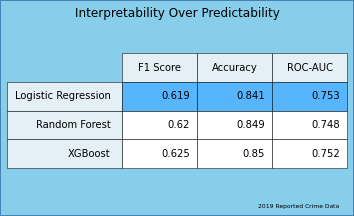

In [171]:
title_text = 'Interpretability Over Predictability'
footer_text = '2019 Reported Crime Data'
fig_background_color = 'skyblue'
fig_border = 'steelblue'
data =  model_scores_df
column_headers = data.columns
row_headers = data.index

cell_text = data.values.astype(str)
# Get some lists of color specs for row and column headers, hard-format first row for highlight
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
colcolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
cellcolors = [["#56b5fd","#56b5fd","#56b5fd"],["w","w","w"],["w","w","w"]]

plt.figure(linewidth=2,
           edgecolor=fig_border,
           facecolor=fig_background_color,
           tight_layout={'pad':1},
           figsize=(5,3)
          )

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=colcolors,
                      colLabels=column_headers,
                      cellColours=cellcolors,
                      loc='center')

the_table.scale(1, 2)
# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Hide axes border
plt.box(on=None)
# Add title
plt.suptitle(title_text)
# Add footer
plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')
# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
plt.savefig('model_selection.png',
            #bbox='tight',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=150
            )